
# TFM - Predicción Temporal de Delitos y Variables Socioeconómicas en Ecuador

**Autor:** Miguel Angel Rosero Aguas  
**Fecha:** 27 agosto 2025  
**Proyecto:** Desarrollo de un Modelo Predictivo de los Delitos en Ecuador mediante Temporal Fusion Transformer (TFT) e Integración con LangChain para Consultas en Lenguaje Natural

  
**Versión del archivo:** data_tfm.csv



## 1. Objetivos y Justificación del Proyecto

- **Objetivo general:**  
  [Describe el objetivo central de tu TFM]
- **Objetivos específicos:**  
  - [Detalla aquí los objetivos secundarios o analíticos]
- **Justificación:**  
  [¿Por qué es relevante este análisis? ¿Qué decisiones puede soportar?]



## 2. Contexto de los Datos

- Fuente de los datos:  
- Periodo de cobertura:  
- Variables principales:
  - Fechas, provincias, cantones, variables socioeconómicas, delitos, etc.
- Observaciones iniciales:



## 3. Setup, Librerías y Carga de Datos

En esta sección se cargan las librerías y el archivo principal.


In [5]:

%pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

df = pd.read_csv("data_tfm.csv")  # Cambia el nombre si usas otro dataset
display(df.head())
print(f"Shape (filas, columnas): {df.shape}")
print("\nColumnas y tipos:")
print(df.dtypes)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


,Periodo,d_provincia_incidente,d_provincia_incidente_cod,d_canton_incidente,d_canton_incidente_cod,d_delito,Total_delitos,Estado_procesal_dominante,d_provincia_incidente_normalized,d_canton_incidente_normalized,...,viv_Deficit_Habitacional_Cuantitativo_ENEMDU,viv_Acceso_Electricidad_ENEMDU,viv_Acceso_Agua_Red_Publica_ENEMDU,viv_Acceso_Servicios_Basicos_ENEMDU,viv_Acceso_Agua_SENAGUA_ENEMDU,viv_Acceso_Recogida_Desechos_ENEMDU,viv_Alumbrado_Publico_ENEMDU,viv_Eliminacion_Excretas_ENEMDU,viv_Eliminacion_Excretas_SENAGUA_ENEMDU,viv_Hacinamiento_ENEMDU
0,2012-06-18,GUAYAS,9,MILAGRO,910,VIOLACION,1,SIN ESTADO,GUAYAS,MILAGRO,...,0.120324,0.999069,0.897485,0.652253,0.910100,0.940693,0.997999,0.972045,0.955018,0.136440
1,2012-07-23,MORONA SANTIAGO,14,MORONA,1401,HURTO,1,ARCHIVO ACEPTADO,MORONA SANTIAGO,MORONA,...,0.320463,0.904523,0.566573,0.372771,0.670655,0.551257,0.881576,0.528813,0.505923,0.250637
2,2013-07-01,COTOPAXI,5,SIGCHOS,507,ABUSO DE CONFIANZA,1,ARCHIVO ACEPTADO,COTOPAXI,SIGCHOS,...,0.180939,0.998740,0.451945,0.544365,0.958735,0.687161,0.997824,0.941955,0.925381,0.089633
3,2014-02-10,PICHINCHA,17,RUMINAHUI,1705,ROBO,1,ARCHIVO ACEPTADO,PICHINCHA,RUMINAHUI,...,0.038489,0.998936,0.978247,0.938598,0.993821,0.972921,0.997062,0.997007,0.986989,0.032384
4,2014-03-17,AZUAY,1,SANTA ISABEL,108,LESIONES CON ENFERMEDAD O INCAPACIDAD QUE NO E...,1,INVESTIGACION PREVIA,AZUAY,SANTA ISABEL,...,0.107939,0.999963,0.901723,0.851867,0.976644,0.920938,0.998642,0.978299,0.968711,0.048305


Shape (filas, columnas): (100, 100)

Columnas y tipos:
Periodo                                     object
d_provincia_incidente                       object
d_provincia_incidente_cod                    int64
d_canton_incidente                          object
d_canton_incidente_cod                       int64
                                            ...   
viv_Acceso_Recogida_Desechos_ENEMDU        float64
viv_Alumbrado_Publico_ENEMDU               float64
viv_Eliminacion_Excretas_ENEMDU            float64
viv_Eliminacion_Excretas_SENAGUA_ENEMDU    float64
viv_Hacinamiento_ENEMDU                    float64
Length: 100, dtype: object



## 4. Análisis Exploratorio de Datos (EDA)
### 4.1. Revisión de valores nulos y estadística descriptiva


In [6]:

print("\nValores nulos por columna:\n", df.isnull().sum())
display(df.describe(include='all').T)



Valores nulos por columna:
 Periodo                                    0
d_provincia_incidente                      0
d_provincia_incidente_cod                  0
d_canton_incidente                         0
d_canton_incidente_cod                     0
                                          ..
viv_Acceso_Recogida_Desechos_ENEMDU        2
viv_Alumbrado_Publico_ENEMDU               2
viv_Eliminacion_Excretas_ENEMDU            2
viv_Eliminacion_Excretas_SENAGUA_ENEMDU    2
viv_Hacinamiento_ENEMDU                    2
Length: 100, dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Periodo,100,94,2016-01-25,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_provincia_incidente,100,21,GUAYAS,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_provincia_incidente_cod,100.0,NaN,NaN,NaN,11.25,5.57479,1.0,9.0,9.0,17.0,24.0
d_canton_incidente,100,43,GUAYAQUIL,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d_canton_incidente_cod,100.0,NaN,NaN,NaN,1127.89,557.050764,101.0,901.0,903.5,1701.0,2403.0
...,...,...,...,...,...,...,...,...,...,...,...
viv_Acceso_Recogida_Desechos_ENEMDU,98.0,NaN,NaN,NaN,0.881362,0.134562,0.415468,0.893146,0.940693,0.964649,0.990961
viv_Alumbrado_Publico_ENEMDU,98.0,NaN,NaN,NaN,0.980045,0.059313,0.581839,0.995534,0.997824,0.997999,0.998867
viv_Eliminacion_Excretas_ENEMDU,98.0,NaN,NaN,NaN,0.938346,0.114551,0.434122,0.968283,0.972045,0.978299,0.997007
viv_Eliminacion_Excretas_SENAGUA_ENEMDU,98.0,NaN,NaN,NaN,0.91673,0.11998,0.418204,0.931983,0.955018,0.968711,0.986989



### 4.2. Variables categóricas principales (provincias, cantones, delitos)


In [7]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"\nValores únicos de '{col}': {df[col].unique()}")



Valores únicos de 'Periodo': ['2012-06-18' '2012-07-23' '2013-07-01' '2014-02-10' '2014-03-17'
 '2014-08-25' '2014-09-15' '2015-02-16' '2015-02-23' '2015-07-13'
 '2015-10-19' '2016-01-18' '2016-01-25' '2016-04-04' '2016-04-11'
 '2016-05-02' '2016-06-06' '2016-06-13' '2016-07-18' '2016-08-15'
 '2016-08-22' '2016-08-29' '2016-09-05' '2016-10-10' '2016-11-07'
 '2016-11-21' '2016-11-28' '2017-02-06' '2017-04-17' '2017-04-24'
 '2017-05-08' '2017-05-15' '2017-05-29' '2017-07-10' '2017-08-07'
 '2017-11-20' '2017-12-11' '2018-02-26' '2018-03-12' '2018-04-30'
 '2018-06-11' '2018-07-30' '2018-09-10' '2018-09-17' '2018-10-08'
 '2018-11-26' '2019-01-07' '2019-02-11' '2019-02-18' '2019-03-11'
 '2019-04-08' '2019-12-02' '2019-12-09' '2019-12-23' '2019-12-30'
 '2020-01-20' '2020-02-10' '2020-02-24' '2020-05-11' '2020-08-17'
 '2020-08-24' '2021-03-01' '2021-03-15' '2021-03-22' '2021-05-03'
 '2021-05-17' '2021-07-26' '2021-09-27' '2022-02-21' '2022-03-28'
 '2022-07-18' '2022-08-22' '2022-09-12' '2022-


### 4.3. Distribución de registros por año, provincia, cantón


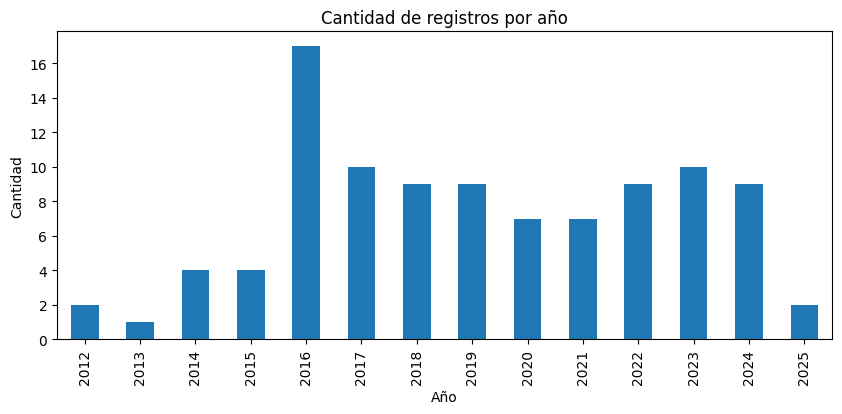

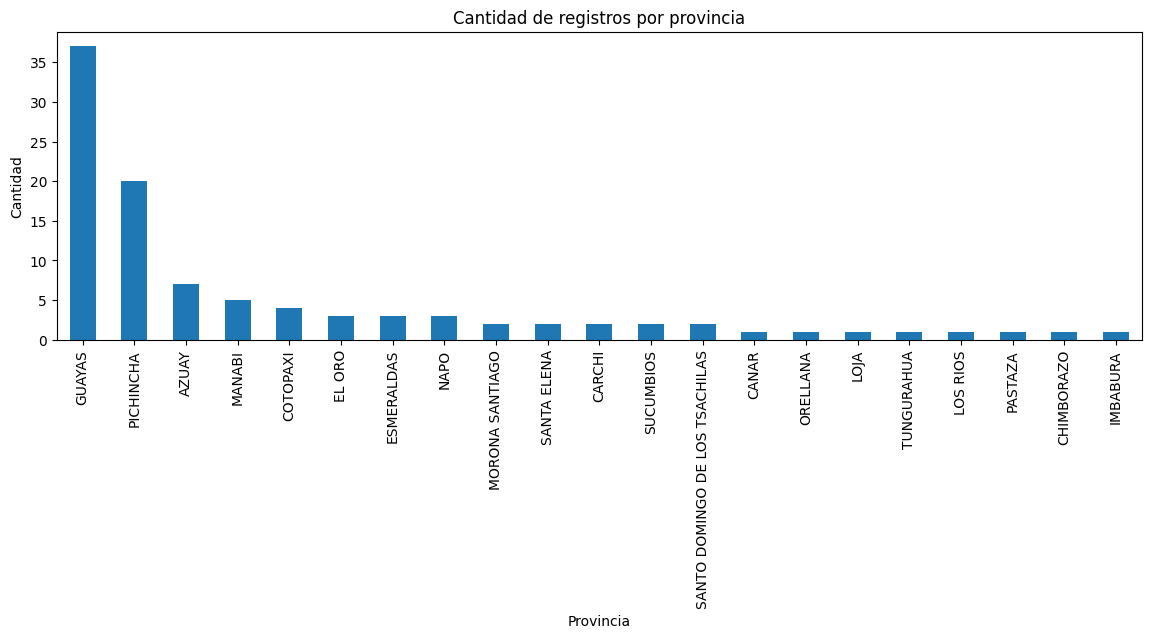

In [8]:

df['Periodo'] = pd.to_datetime(df['Periodo'], errors='coerce')
df['Año'] = df['Periodo'].dt.year

plt.figure(figsize=(10,4))
df['Año'].value_counts().sort_index().plot(kind='bar')
plt.title("Cantidad de registros por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(14,4))
df['d_provincia_incidente'].value_counts().plot(kind='bar')
plt.title("Cantidad de registros por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.show()



### 4.4. Serie temporal de la variable objetivo y estacionalidad


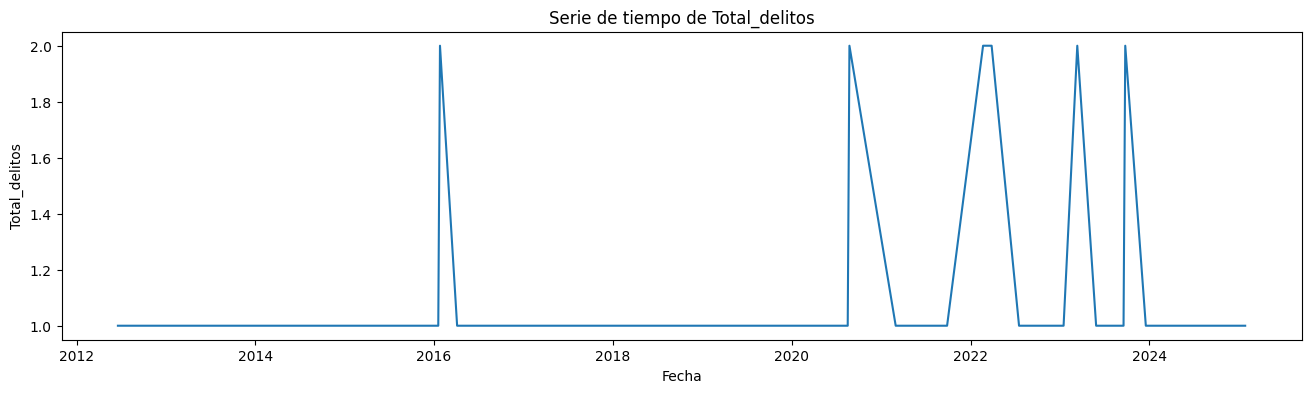

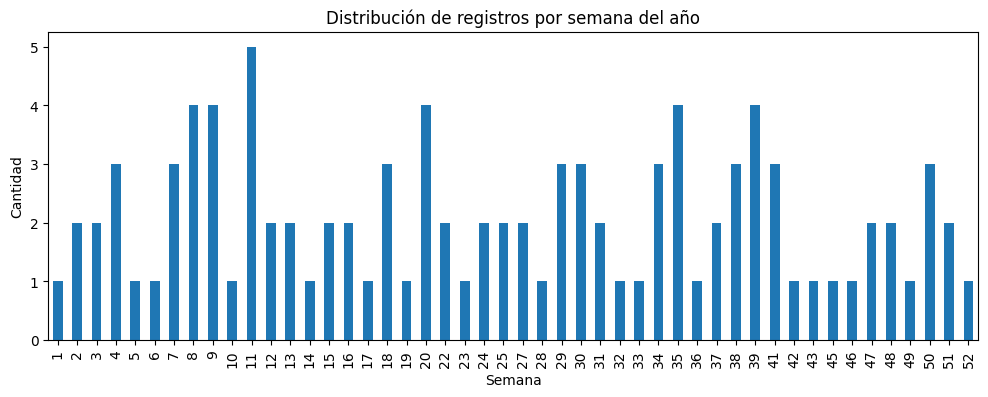

In [9]:

target_var = 'Total_delitos' if 'Total_delitos' in df.columns else df.columns[-1]
if target_var in df.columns:
    df_grouped = df.groupby('Periodo')[target_var].sum().reset_index()
    plt.figure(figsize=(16,4))
    plt.plot(df_grouped['Periodo'], df_grouped[target_var])
    plt.title(f"Serie de tiempo de {target_var}")
    plt.xlabel("Fecha")
    plt.ylabel(target_var)
    plt.show()

df['Semana'] = df['Periodo'].dt.isocalendar().week
plt.figure(figsize=(12,4))
df['Semana'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de registros por semana del año")
plt.xlabel("Semana")
plt.ylabel("Cantidad")
plt.show()



### 4.5. Correlación de variables numéricas


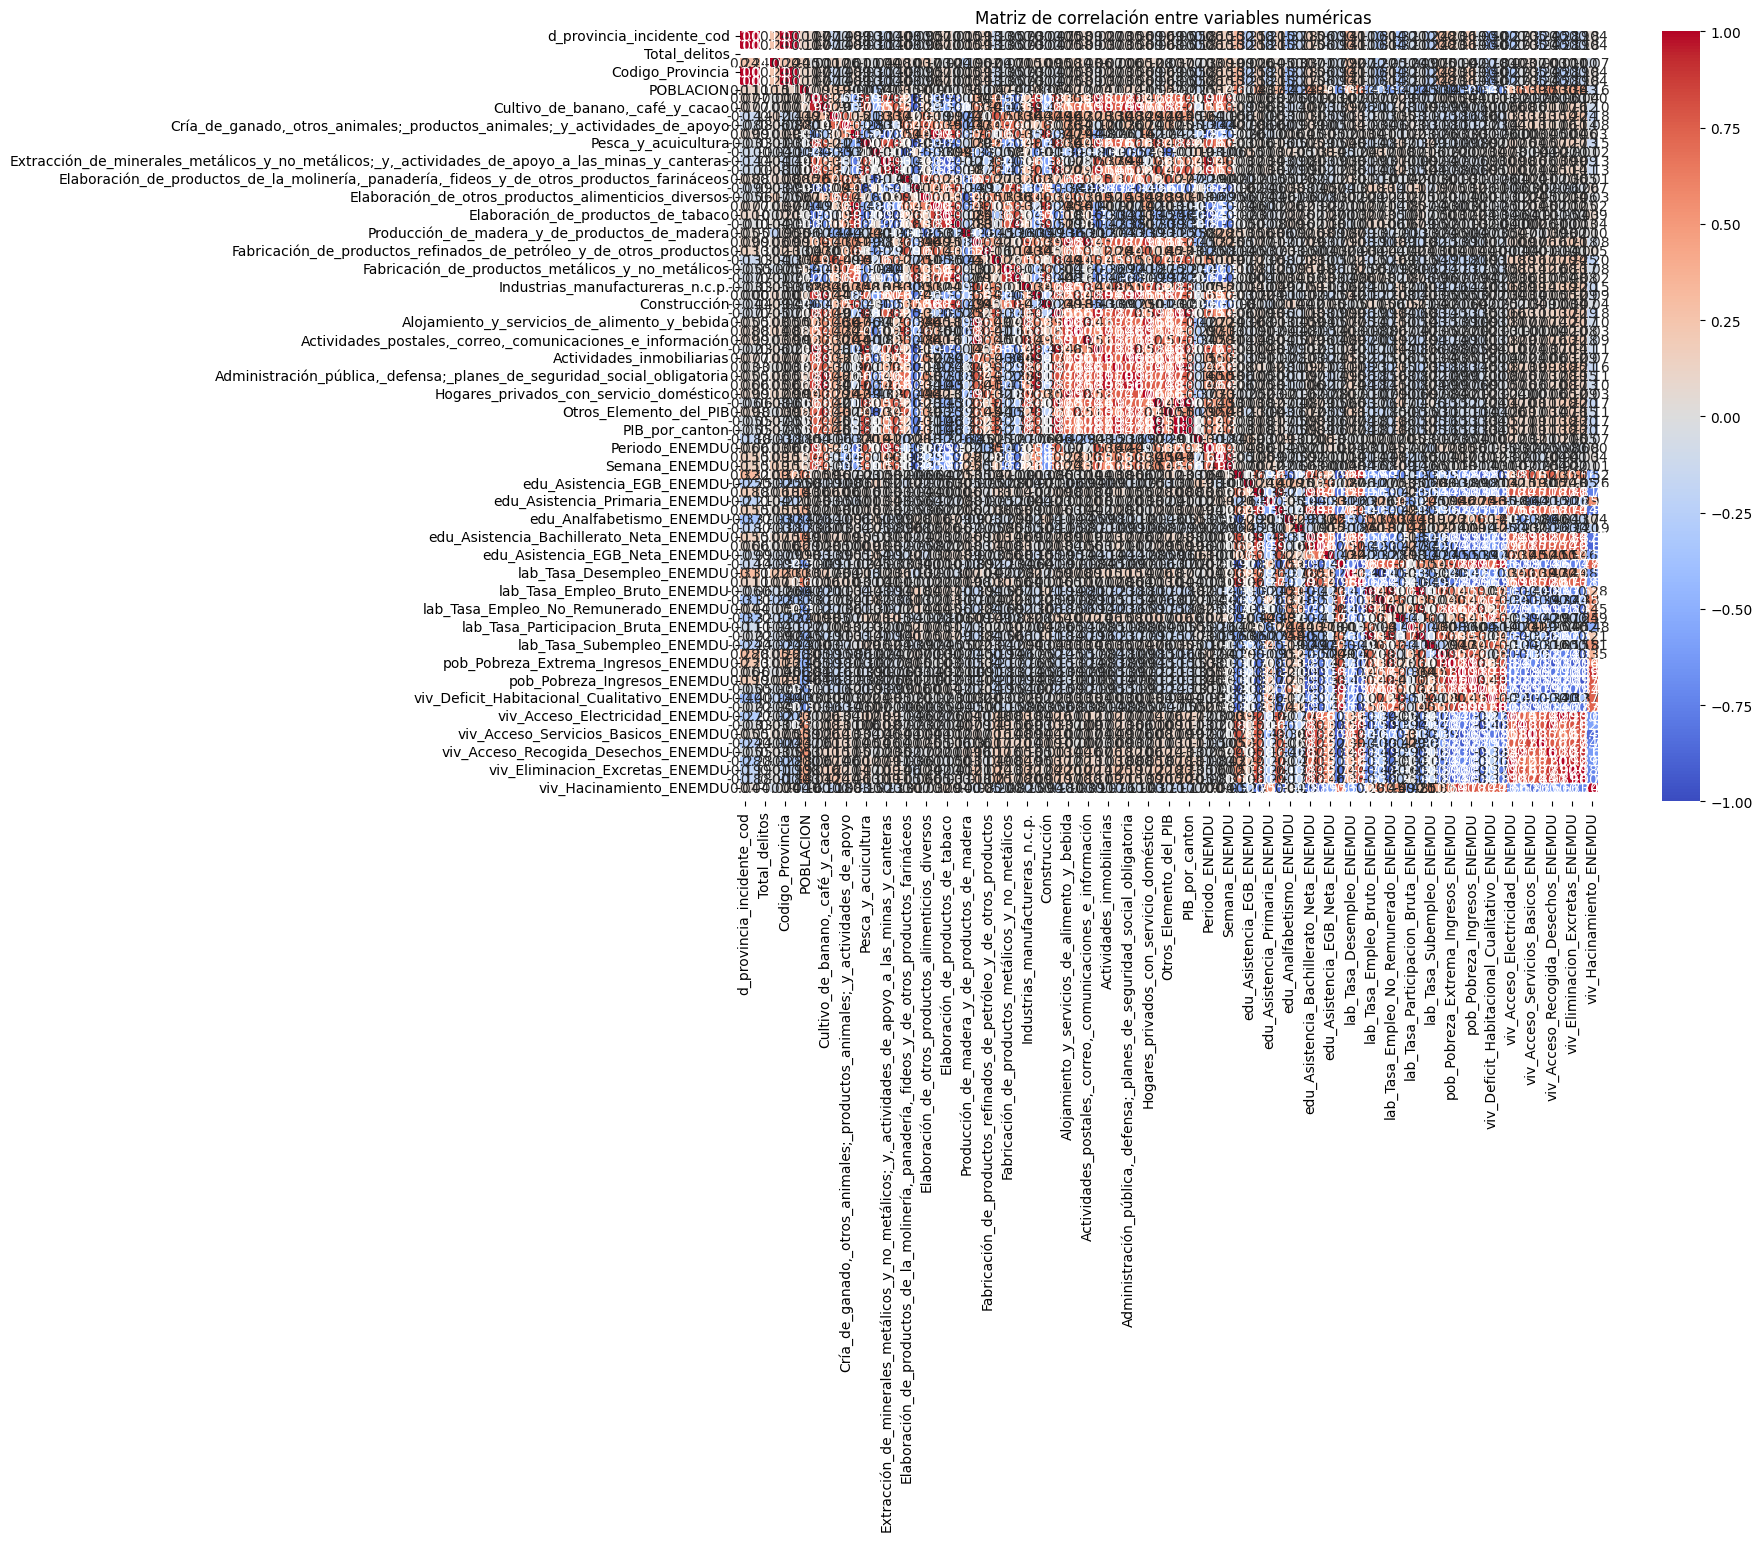

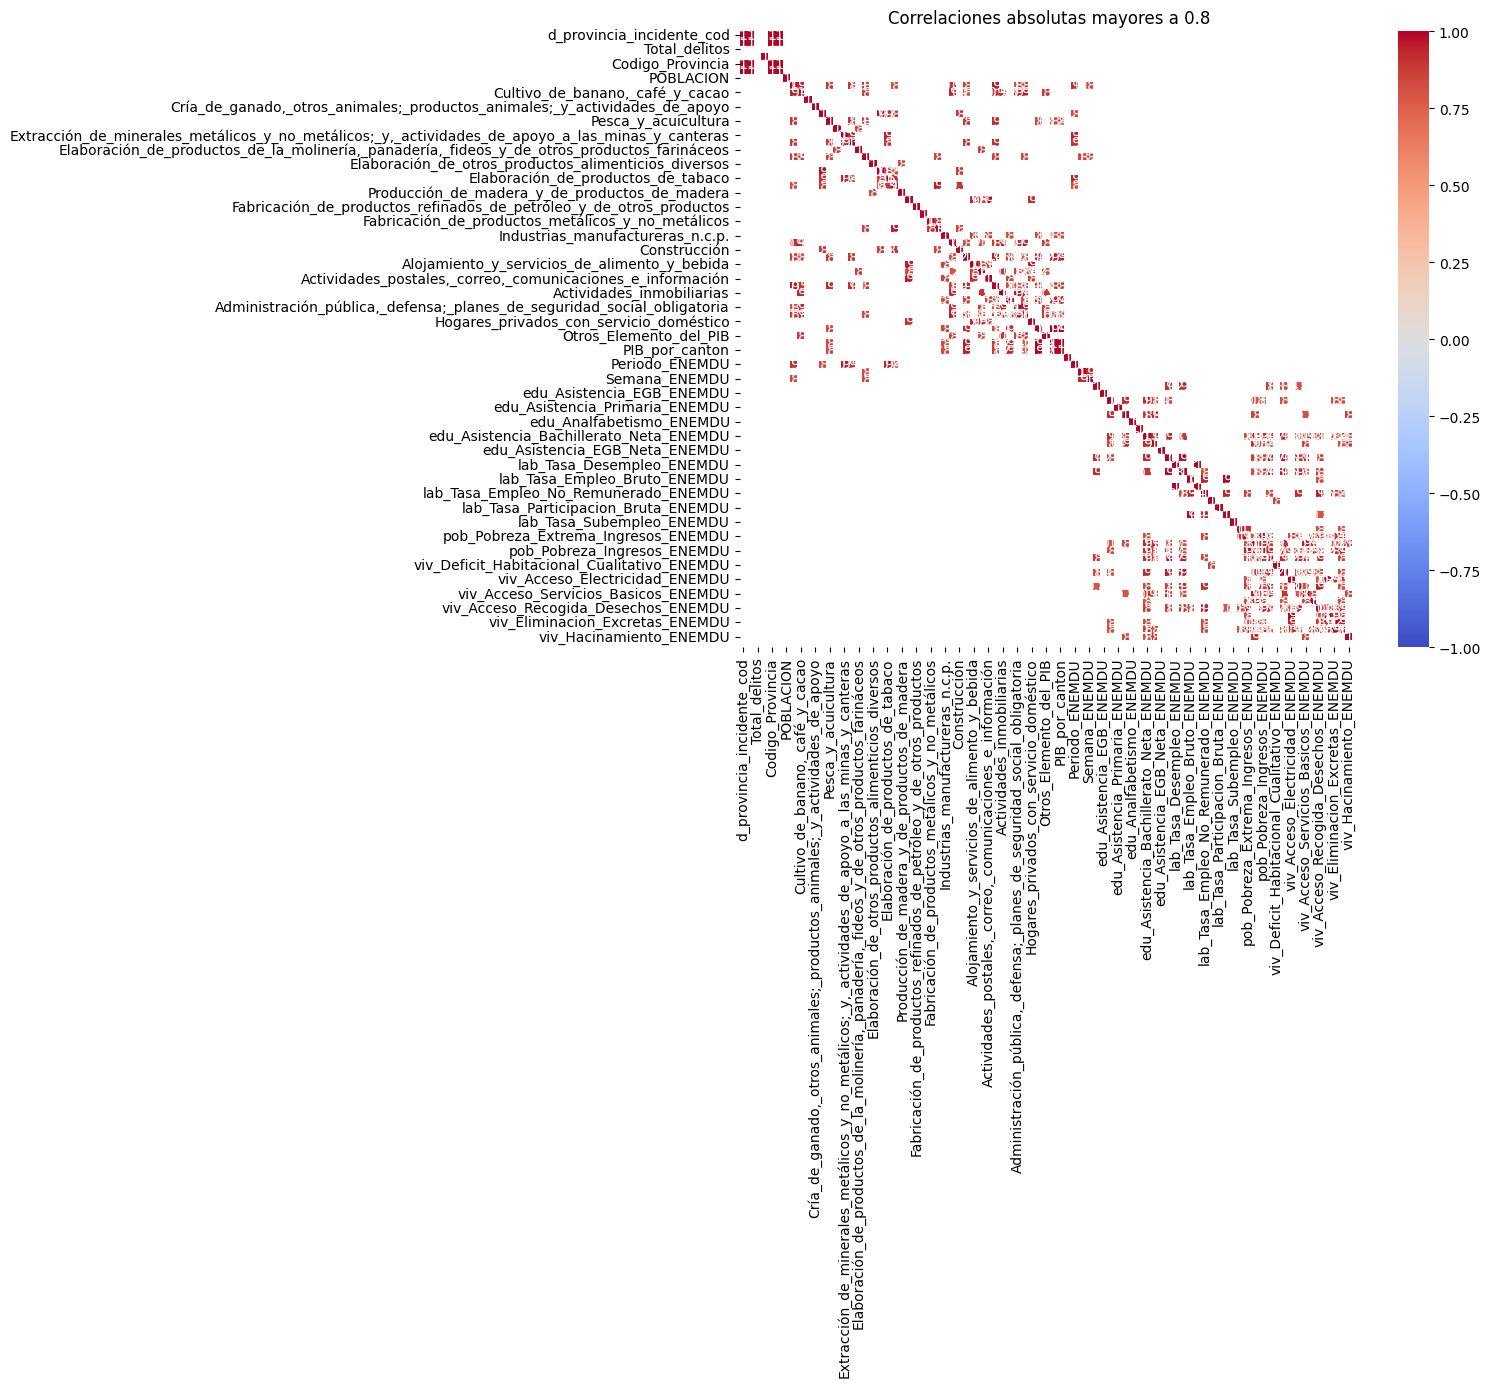

In [ ]:

plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

import numpy as np

corr = df.corr(numeric_only=True)
high_corr = corr.abs()[corr.abs() > 0.9]
plt.figure(figsize=(10,8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlaciones absolutas mayores a 0.8")
plt.show()



### 4.6. Observaciones iniciales EDA

*Aquí puedes anotar tus hallazgos, outliers, problemas detectados o cualquier curiosidad relevante para tu TFM.*



## 5. Limpieza de Datos y Feature Engineering

- Detalla aquí cualquier imputación de nulos, estandarización, creación de variables nuevas (lags, rolling means, codificación de categóricas, etc).


In [12]:

# Ejemplo de creación de variable lag si tu variable objetivo es delitos
if 'Total_delitos' in df.columns:
    df = df.sort_values(['d_provincia_incidente', 'Periodo'])
    df['delitos_lag1'] = df.groupby('d_provincia_incidente')['Total_delitos'].shift(1)
    display(df[['Periodo', 'd_provincia_incidente', 'Total_delitos', 'delitos_lag1']].head(10))


,Periodo,d_provincia_incidente,Total_delitos,delitos_lag1
4,2014-03-17,AZUAY,1,NaN
11,2016-01-18,AZUAY,1,1.0
12,2016-01-25,AZUAY,1,1.0
28,2017-02-06,AZUAY,1,1.0
55,2019-12-30,AZUAY,1,1.0
72,2022-03-28,AZUAY,1,1.0
75,2022-08-22,AZUAY,1,1.0
18,2016-06-13,CANAR,1,NaN
29,2017-04-17,CARCHI,1,NaN
78,2022-12-12,CARCHI,1,1.0



## 6. Split temporal: train/test y validación

- Explica aquí cómo separarás los datos para entrenamiento y prueba (importante en series temporales).


In [14]:

# Split ejemplo (último 10% como test)
train_size = int(len(df)*0.9)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

print(f"Train shape: {train_df.shape} | Test shape: {test_df.shape}")


Train shape: (90, 101) | Test shape: (10, 101)



## 7. Modelos Tradicionales: ARIMAX, Prophet (Baseline)

- Detalla aquí los modelos clásicos y métricas iniciales. Explica por qué los usas y las variables exógenas incluidas.
- Puedes dejar celdas en blanco para ir completando tras probar código.


In [15]:

# Espacio para código de modelado (usa statsmodels para ARIMAX o Prophet)



## 8. Modelos Deep Learning: Temporal Fusion Transformer (TFT)

- Explica aquí la preparación de datos especial, arquitectura, parámetros y resultados.
- Deja espacio para iterar y anotar tus experimentos.


In [ ]:

# Espacio para código TFT (puedes usar Pytorch Forecasting, Tensorflow, etc.)



## 9. Evaluación de Modelos y Comparación de Métricas

- Tabla resumen con MAE, RMSE, MAPE, etc.
- Gráficas comparativas.



## 10. Interpretabilidad y Explicabilidad

- SHAP, importancia de variables, análisis de residuos, visualizaciones extra.



## 11. Conclusiones, Limitaciones y Recomendaciones

- Resume los hallazgos, discute límites del análisis/modelo y plantea ideas para futuras mejoras o despliegue.
